# 1. Package Imports 

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 2. EDA 

In [3]:
data = pd.read_csv("Heart Attack/heart.csv")

In [4]:
print(data.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [5]:
print(data.describe())

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

The label for prediction in this dataset is 'output'. I use all the other columns as features in my models.

In [6]:
features = data.iloc[:,0:-1]
labels  = data.iloc[:,-1]
print(features)
print(labels)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  
0      0      1  
1      0      2

# 3. Data scaling and splitting

It's necessary to scale the features so none of them exert an undue weight on the model.

In [7]:
std_scaler = StandardScaler()
scaled_features = pd.DataFrame(std_scaler.fit_transform(features), columns = features.columns)
print(scaled_features)

          age       sex        cp    trtbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

     thalachh      exng   oldpeak       slp       caa     thall  
0    0.01

The data is then split into a train and test set.

In [8]:
features_train, features_val, labels_train, labels_val = train_test_split(scaled_features, labels, test_size = 0.2, shuffle = True, random_state = 0)

# 4.1 KNN model 

KNN models predict the label of a datapoint using the labels of nearby datapoints. I chose the number of neighbours to be 5.

In [9]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [14]:
classifier.fit(features_train, labels_train)
print(classifier.score(features_val,labels_val))

0.819672131147541


In [15]:
y_predict = classifier.predict(features_val)

In [16]:
print(y_predict)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1]


Precision and recall are very useful metrics for evaluating the effectiveness of a classification model. The confusion matrix shows visually the rate of misclassification. Ideally the confusion matrix is completely diagonal.

In [17]:
print(classification_report(labels_val, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.83      0.85      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



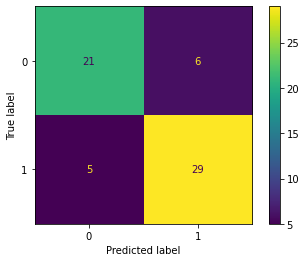

In [18]:
cm = confusion_matrix(labels_val, y_predict)
cm_display = ConfusionMatrixDisplay(cm).plot()

# 4.2 Neural Network model 

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

Hidden layers use ReLU activation as this provides universal approximation to a satisfactory extent over this dataset. The output layer has Softmax activation as this is a classification problem. Softmax outputs a vector of weighted probabilities corresponding to each class.

In [20]:
classifier_1 = Sequential()
classifier_1.add(tf.keras.Input(shape=(13,)))
classifier_1.add(tf.keras.layers.Dense(10,activation="relu"))
classifier_1.add(tf.keras.layers.Dense(2, activation = "softmax"))

In [21]:
acc = tf.keras.metrics.CategoricalAccuracy()
auc = tf.keras.metrics.AUC()

classifier_1.compile(optimizer = 'Adam', loss = tf.keras.losses.CategoricalCrossentropy(), metrics=[acc,auc])

In [22]:
labels_train_1 = tf.keras.utils.to_categorical(labels_train, dtype = 'int64', num_classes = 2)
labels_val_1 = tf.keras.utils.to_categorical(labels_val, dtype = 'int64', num_classes = 2)

I fit the model over 100 epochs. We can see from the curves that the neural network overtrains around the 20th epoch as the training accuracy exceeds the validation accuracy.

Epoch 1/100
20/20 [==============================] - 0s 18ms/step - loss: 0.9745 - categorical_accuracy: 0.4404 - auc: 0.4296 - val_loss: 0.7770 - val_categorical_accuracy: 0.5918 - val_auc: 0.5912
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8693 - categorical_accuracy: 0.4974 - auc: 0.4909 - val_loss: 0.7060 - val_categorical_accuracy: 0.6327 - val_auc: 0.6443
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7803 - categorical_accuracy: 0.5596 - auc: 0.5658 - val_loss: 0.6555 - val_categorical_accuracy: 0.6327 - val_auc: 0.6901
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7130 - categorical_accuracy: 0.6114 - auc: 0.6272 - val_loss: 0.6130 - val_categorical_accuracy: 0.6735 - val_auc: 0.7253
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6510 - categorical_accuracy: 0.6477 - auc: 0.6975 - val_loss: 0.5757 - val_categorical_accuracy: 0.7143 - val_auc: 0.7611
Epoch 6/100
20

20/20 [==============================] - 0s 2ms/step - loss: 0.3153 - categorical_accuracy: 0.8653 - auc: 0.9411 - val_loss: 0.3804 - val_categorical_accuracy: 0.8367 - val_auc: 0.9046
Epoch 43/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3141 - categorical_accuracy: 0.8653 - auc: 0.9414 - val_loss: 0.3787 - val_categorical_accuracy: 0.8367 - val_auc: 0.9067
Epoch 44/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3120 - categorical_accuracy: 0.8756 - auc: 0.9424 - val_loss: 0.3780 - val_categorical_accuracy: 0.8367 - val_auc: 0.9080
Epoch 45/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3107 - categorical_accuracy: 0.8705 - auc: 0.9427 - val_loss: 0.3786 - val_categorical_accuracy: 0.8367 - val_auc: 0.9071
Epoch 46/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3093 - categorical_accuracy: 0.8705 - auc: 0.9430 - val_loss: 0.3778 - val_categorical_accuracy: 0.8367 - val_auc: 0.9100
Epoch 47/100
20/20 [===

Epoch 83/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2731 - categorical_accuracy: 0.8912 - auc: 0.9573 - val_loss: 0.3707 - val_categorical_accuracy: 0.8163 - val_auc: 0.9159
Epoch 84/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2728 - categorical_accuracy: 0.8912 - auc: 0.9576 - val_loss: 0.3696 - val_categorical_accuracy: 0.8163 - val_auc: 0.9146
Epoch 85/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2718 - categorical_accuracy: 0.8912 - auc: 0.9581 - val_loss: 0.3690 - val_categorical_accuracy: 0.8163 - val_auc: 0.9159
Epoch 86/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2710 - categorical_accuracy: 0.8912 - auc: 0.9585 - val_loss: 0.3723 - val_categorical_accuracy: 0.8163 - val_auc: 0.9159
Epoch 87/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2701 - categorical_accuracy: 0.8964 - auc: 0.9589 - val_loss: 0.3711 - val_categorical_accuracy: 0.8367 - val_auc: 0.9171
Epoch 88/1

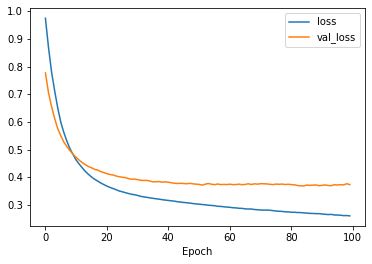

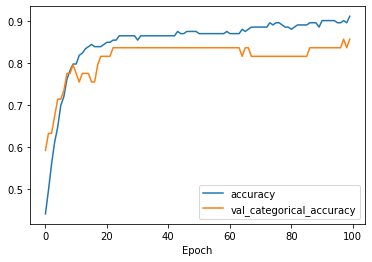

In [23]:
history = classifier_1.fit(features_train, labels_train_1, validation_split = 0.2, batch_size = 10, epochs = 100)

plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()
plt.plot(history.history['categorical_accuracy'], label = 'accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'val_categorical_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [24]:
y_predict_1 = classifier_1.predict(features_val)
y_pred_1 = np.argmax(y_predict_1, axis=1)
labels_val_1_1 = np.argmax(labels_val_1,axis=1)
print(y_pred_1)
print(labels_val_1_1)
print(classification_report(labels_val_1_1, y_pred_1))

[0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1]
[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1]
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.91      0.88      0.90        34

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



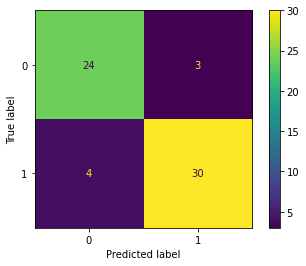

In [25]:
cm1 = confusion_matrix(labels_val, y_pred_1)
cm_display = ConfusionMatrixDisplay(cm1).plot()

# 4.3 Logistic Regressor 

In [27]:
log_regressor = LogisticRegression()

In [29]:
log_regressor.fit(features_train, labels_train)
log_regressor.score(features_val,labels_val)

0.8524590163934426

In [30]:
y_pred_log = log_regressor.predict(features_val)

In [31]:
print(classification_report(labels_val, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



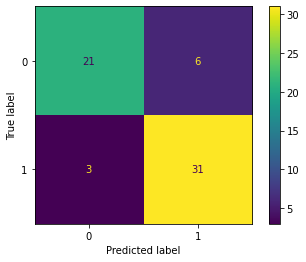

In [32]:
cm = confusion_matrix(labels_val, y_pred_log)
cm_display = ConfusionMatrixDisplay(cm).plot()

# 4.4 Support Vector Machine 

In [34]:
svm_classifier = svm.SVC()

In [35]:
svm_classifier.fit(features_train,labels_train)
svm_classifier.score(features_val, labels_val)

0.8688524590163934

In [36]:
y_pred_svm = svm_classifier.predict(features_val)

In [37]:
print(classification_report(labels_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        27
           1       0.84      0.94      0.89        34

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



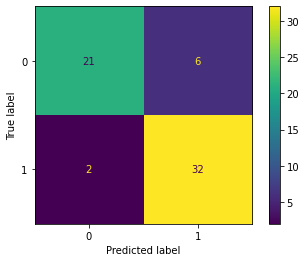

In [38]:
cm = confusion_matrix(labels_val, y_pred_svm)
cm_display = ConfusionMatrixDisplay(cm).plot()